In [5]:
from pykeen.models import NodePiece
from pykeen.nn import AutoSFInteraction
model = NodePiece(
    triples_factory=training,
    interaction = 'RotatE',
    tokenizers=["AnchorTokenizer", "RelationTokenizer"],
    num_tokens=[25, 8],
    random_seed = 21159,
    tokenizers_kwargs=[
        dict(
            selection="MixtureAnchorSelection",
            selection_kwargs=dict(
                selections=["degree", "pagerank","random"],
                ratios=[0.4, 0.4, 0.2],
                num_anchors=85,
            ),
            searcher="ScipySparse",
        ),
        dict(),  # empty dict for the RelationTokenizer - it doesn't need any kwargs
    ],
    embedding_dim=32,
)

INFO:pykeen.nn.node_piece.tokenization:Selecting anchors according to MixtureAnchorSelection(num_anchors=85, selections=[DegreeAnchorSelection(num_anchors=34), PageRankAnchorSelection(num_anchors=34), RandomAnchorSelection(num_anchors=17)])
INFO:pykeen.nn.node_piece.tokenization:Searching closest anchors with ScipySparseAnchorSearcher(max_iter=5)


sampling:   0%|          | 0.00/2.95k [00:00<?, ?it/s]

In [3]:
from pykeen.triples import TriplesFactory
from pykeen.pipeline import pipeline
from pykeen.models import BoxE
from torch.optim import Adam
import wandb

training = TriplesFactory.from_path(
    './data/X4/train.txt',
    create_inverse_triples = False
)

In [5]:

#wandb.init(project="pykeen_project", entity="sheshan")

model = BoxE(
    triples_factory = training,
    embedding_dim = 64,
    tanh_map = True,
    random_seed = 21159
)
#model = ComplEx(
#    triples_factory = training,
#    embedding_dim = 64,
#    tanh_map = True,
#    random_seed = 21159
#)

testing = TriplesFactory.from_path(
    './data/X4/test.txt',
    entity_to_id=training.entity_to_id,
    relation_to_id=training.relation_to_id,
    #create_inverse_triples = True,
                        )

validation = TriplesFactory.from_path(
    path='./data/X4/valid.txt',
    entity_to_id=training.entity_to_id,
    relation_to_id=training.relation_to_id,
                        )

result = pipeline(
    training=training,
    testing=testing,
    device='cuda',
    optimizer = Adam,
    model=model,
    evaluator='RankBasedEvaluator',
    random_seed = 21159,
    validation= validation,
    training_kwargs=dict(
        num_epochs=1424,
        checkpoint_name='cpx.pt',
        checkpoint_directory='/checkpoint/new',
        checkpoint_frequency=16,
    ),
)

result.save_to_directory('Xiangyu_BoxE2')

INFO:pykeen.pipeline.api:loaded random seed 21159 from checkpoint.
INFO:pykeen.pipeline.api:Using device: cuda
INFO:pykeen.training.training_loop:=> loading checkpoint '/checkpoint/new/cpx.pt'
INFO:pykeen.training.training_loop:=> loaded checkpoint '/checkpoint/new/cpx.pt' stopped after having finished epoch 1024
INFO:pykeen.stoppers.stopper:=> loading stopper summary dict from training loop checkpoint in '/checkpoint/new/cpx.pt'
INFO:pykeen.stoppers.stopper:=> loaded stopper summary dictionary from checkpoint in '/checkpoint/new/cpx.pt'


Training epochs on cuda:0:  72%|#######1  | 1024/1424 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/88 [00:00<?, ?batch/s]

INFO:pykeen.training.training_loop:=> Saved checkpoint after having finished epoch 1424.
INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=4096.


Evaluating on cuda:0:   0%|          | 0.00/3.33k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.43s seconds
INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=2948, num_relations=18, create_inverse_triples=False, num_triples=22341, path="/output/data/X4/train.txt") to file:///output/Xiangyu_BoxE2/training_triples
INFO:pykeen.pipeline.api:Saved to directory: file:///output/Xiangyu_BoxE2


In [9]:
from pykeen import predict
predict.predict_target(model=model, head="p", relation="+voi", triples_factory=training).df

,tail_id,score,tail_label
2828,2828,-4.627784,dʑ
2946,2946,-4.745692,ʑ
2936,2936,-4.747501,ɣ
2825,2825,-5.053135,d
2935,2935,-5.096650,ɡ
...,...,...,...
2684,2684,-13.281719,8721
999,999,-13.318329,17401
1930,1930,-13.322428,25517
30,30,-13.528795,10165


In [68]:
model

BoxE(
  (loss): NSSALoss()
  (interaction): BoxEInteraction()
  (entity_representations): ModuleList(
    (0): Embedding(
      (_embeddings): Embedding(2946, 64)
    )
    (1): Embedding(
      (_embeddings): Embedding(2946, 64)
    )
  )
  (relation_representations): ModuleList(
    (0): Embedding(
      (_embeddings): Embedding(12, 64)
    )
    (1): Embedding(
      (_embeddings): Embedding(12, 64)
    )
    (2): Embedding(
      (_embeddings): Embedding(12, 1)
    )
    (3): Embedding(
      (_embeddings): Embedding(12, 64)
    )
    (4): Embedding(
      (_embeddings): Embedding(12, 64)
    )
    (5): Embedding(
      (_embeddings): Embedding(12, 1)
    )
  )
  (weight_regularizers): ModuleList()
)

In [74]:
embs.weight.detach().numpy()

array([[-1.56462081e-02, -2.16721487e+00,  7.48978043e-03,
         3.65597296e+00, -4.95930290e+00, -1.36154950e-01,
         1.39244124e-01, -5.09744644e+00,  2.73818195e-01,
         2.00027776e+00, -3.15859914e-01, -3.67638993e+00,
         4.01684493e-01,  1.23531389e+00, -4.25185823e+00,
         1.09761775e+00, -6.96375549e-01, -1.64808352e-02,
        -3.98021042e-01,  5.69392979e-01,  3.90935946e+00,
        -5.58495092e+00, -2.68144701e-02, -3.84427500e+00,
        -7.05025733e-01,  5.74788988e-01, -4.85341042e-01,
        -4.77413416e+00, -1.45878553e-01,  2.05102026e-01,
        -6.93199813e-01,  1.67701375e+00, -8.67288113e-02,
        -2.92969370e+00,  5.70347940e-04,  4.14131975e+00,
         4.06962633e+00,  5.43058348e+00,  7.39807725e-01,
        -1.01329815e+00, -2.21784472e+00, -2.47532701e+00,
        -2.88792062e+00,  4.62729931e-02, -3.02632380e+00,
        -4.06906486e-01, -4.59151924e-01, -1.65170431e-01,
         5.23246241e+00, -2.44131398e+00, -3.16226315e+0

In [64]:
import numpy as np

In [24]:
import joblib as jl
jl.dump(result,'Xy_ConvE.model')

['Xy_ConvE.model']

In [ ]:
with open('./data/dict
checkpoint['entity_to_id_dict']

In [31]:
a = checkpoint['model_state_dict']['relation_representations.0._embeddings.weight'].cpu().numpy()
b = checkpoint['model_state_dict']['relation_representations.1._embeddings.weight'].cpu().numpy()
c = checkpoint['model_state_dict']['relation_representations.2._embeddings.weight'].cpu().numpy()
d = checkpoint['model_state_dict']['relation_representations.3._embeddings.weight'].cpu().numpy()

In [25]:
a.shape

(4824, 256)

In [32]:
import numpy as np
np.savez('./data/rels.txt',a,b,c,d)

In [12]:
model

ModuleNotFoundError: No module named 'pykeen.models.predict'

ValueError: Complex data not supported
[[ 0.3781345 -3.6084655e-01j  0.09390053+4.3499310e-02j
  -1.0443127 -3.2956937e-01j ... -0.20330974+1.0654817e+00j
  -0.20248395-3.9709845e-01j  0.7661117 +1.1174473e-03j]
 [ 0.7572415 +8.4394449e-01j -1.1377153 +6.7232960e-01j
  -2.2249918 -1.3278307e-01j ...  0.04713264+7.2618312e-01j
   0.87000316+4.8082000e-01j -1.635183  +6.6057360e-01j]
 [-0.82199085+1.2415135e-01j  0.21124898-9.1059297e-02j
  -1.6013912 -5.3352004e-01j ... -0.08804699-9.4887815e-02j
  -0.54006475-1.0844716e+00j  1.755571  -1.3291166e+00j]
 ...
 [ 0.7884725 +1.9453542e-01j  1.2218179 +7.5266087e-01j
  -1.5205196 -7.5470078e-01j ... -0.3012225 -2.4313221e-02j
   2.006678  +7.2385943e-01j -1.6055052 -9.8005724e-01j]
 [ 0.2621836 +1.6384976e+00j  0.49529266+2.5210388e-02j
  -1.4453493 -6.9120735e-01j ... -0.0028849 -7.2415091e-02j
  -0.04615272-1.9769661e-01j  2.1367304 +1.4294608e-01j]
 [ 0.29790193+2.3023668e-01j -0.50511813+1.2130161e-01j
  -1.3373092 -9.6548563e-01j ...  0.93450856-4.4077992e-01j
  -1.2920572 +4.2834905e-01j -0.13854231-1.3528819e-01j]]


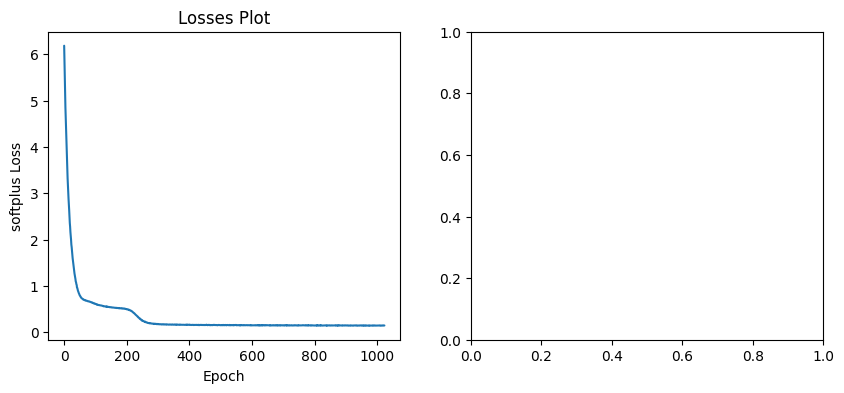

In [17]:
result.plot()

In [44]:
import matplotlib

ModuleNotFoundError: No module named 'matplotlib'

In [76]:
training.get_entities()

AttributeError: 'TriplesFactory' object has no attribute 'get_entities'

In [20]:
model

BoxE(
  (loss): NSSALoss()
  (interaction): BoxEInteraction()
  (entity_representations): ModuleList(
    (0): Embedding(
      (_embeddings): Embedding(2946, 64)
    )
    (1): Embedding(
      (_embeddings): Embedding(2946, 64)
    )
  )
  (relation_representations): ModuleList(
    (0): Embedding(
      (_embeddings): Embedding(12, 64)
    )
    (1): Embedding(
      (_embeddings): Embedding(12, 64)
    )
    (2): Embedding(
      (_embeddings): Embedding(12, 1)
    )
    (3): Embedding(
      (_embeddings): Embedding(12, 64)
    )
    (4): Embedding(
      (_embeddings): Embedding(12, 64)
    )
    (5): Embedding(
      (_embeddings): Embedding(12, 1)
    )
  )
  (weight_regularizers): ModuleList()
)

In [16]:
model.num_parameters

378624